In [1]:
import numpy as np
import pandas as pd

In [2]:
genres = np.load("namesngenre.npy")

In [3]:
train = np.load("ratings_train.npy")

In [4]:
movie = pd.DataFrame(genres, columns=["title", "genres"])
movie

title  \
0                              Toy Story (1995)   
1                                Jumanji (1995)   
2                       Grumpier Old Men (1995)   
3                      Waiting to Exhale (1995)   
4            Father of the Bride Part II (1995)   
...                                         ...   
4975                          Game Night (2018)   
4976                   Making a Murderer (2015)   
4977                         Elsa & Fred (2005)   
4978                         Tomb Raider (2018)   
4979  Fred Armisen: Standup for Drummers (2018)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
4975                   Action|Comedy|Crime|Horror  
4976                            Crime|Documentary  
4977                         Comedy|Drama|Romance  
4978                     Action|Adventure|Fantasy  
4979                                       Comedy  

[4980 rows x 2 columns]

In [47]:
import re

def remove_date_part(title):
    # Convert the title to lowercase
    title = title.lower()

    # Regex pattern to match the date part within parentheses
    date_pattern = r'\s*\(\s*(\d{4})\s*\)$'
    # Regex pattern to match any text within parentheses
    text_in_parentheses_pattern = r'\s*\(.*?\)\s*'
    
    # Remove commas from the title
    title = title.replace(',', '')

    # Search for the year in the title
    match = re.search(date_pattern, title)

    if match:
        year = match.group(1)  # Extract the year from the match
        new_title = re.sub(date_pattern, '', title).strip()  # Remove the date part and strip whitespace
    else:
        year = None
        new_title = title  # Keep original title if no year found

    # Remove any text in parentheses from the new_title
    new_title = re.sub(text_in_parentheses_pattern, '', new_title).strip()

    # Move "the" to the front if it appears at the end
    if new_title.endswith(" the"):
        new_title = "the " + new_title[:-4].strip()  # Remove "the" from the end
    elif new_title.endswith(" a"):
        new_title = "a " + new_title[:-2].strip() 
    elif new_title.endswith(" les"):
        new_title = "les " + new_title[:-4].strip() 

    return new_title, year  # Return the new title and year or None

In [48]:
new = movie["title"].apply(lambda s: remove_date_part(s))
new

0                                (toy story, 1995)
1                                  (jumanji, 1995)
2                         (grumpier old men, 1995)
3                        (waiting to exhale, 1995)
4              (father of the bride part ii, 1995)
                           ...                    
4975                            (game night, 2018)
4976                     (making a murderer, 2015)
4977                           (elsa & fred, 2005)
4978                           (tomb raider, 2018)
4979    (fred armisen: standup for drummers, 2018)
Name: title, Length: 4980, dtype: object

In [147]:
new

0                                (toy story, 1995)
1                                  (jumanji, 1995)
2                         (grumpier old men, 1995)
3                        (waiting to exhale, 1995)
4              (father of the bride part ii, 1995)
                           ...                    
4975                            (game night, 2018)
4976                     (making a murderer, 2015)
4977                           (elsa & fred, 2005)
4978                           (tomb raider, 2018)
4979    (fred armisen: standup for drummers, 2018)
Name: title, Length: 4980, dtype: object

In [148]:
tuple_df = pd.DataFrame(new)
tuple_df.columns = ['Tuple']  # Rename column for clarity

In [149]:
tuple_df

Tuple
0                              (toy story, 1995)
1                                (jumanji, 1995)
2                       (grumpier old men, 1995)
3                      (waiting to exhale, 1995)
4            (father of the bride part ii, 1995)
...                                          ...
4975                          (game night, 2018)
4976                   (making a murderer, 2015)
4977                         (elsa & fred, 2005)
4978                         (tomb raider, 2018)
4979  (fred armisen: standup for drummers, 2018)

[4980 rows x 1 columns]

In [157]:
tuple_df['title'] = tuple_df['Tuple'].apply(lambda x: x[0])

# Create a mapping DataFrame from tuple_df
mapping_df = tuple_df.reset_index().rename(columns={'index': 'movieId'})

# Merge the original new_df with the mapping DataFrame based on the 'title' column
final_df = tuple_df.merge(mapping_df[['movieId', 'title']], on='title', how='left')

In [158]:
final_df

Tuple  \
0                              (toy story, 1995)   
1                                (jumanji, 1995)   
2                       (grumpier old men, 1995)   
3                      (waiting to exhale, 1995)   
4            (father of the bride part ii, 1995)   
...                                          ...   
5185                          (game night, 2018)   
5186                   (making a murderer, 2015)   
5187                         (elsa & fred, 2005)   
5188                         (tomb raider, 2018)   
5189  (fred armisen: standup for drummers, 2018)   

                                   title  movieId  
0                              toy story        0  
1                                jumanji        1  
2                       grumpier old men        2  
3                      waiting to exhale        3  
4            father of the bride part ii        4  
...                                  ...      ...  
5185                          game night     4975  
5186                   making a murderer     4976  
5187                         elsa & fred     4977  
5188                         tomb raider     4978  
5189  fred armisen: standup for drummers     4979  

[5190 rows x 3 columns]

In [146]:
final_df[final_df["title"] == "toy story"]

Empty DataFrame
Columns: [Tuple, title, movieId]
Index: []

In [53]:
import requests
import xmltodict
import json

In [54]:
import requests

def get_movie_data(api_key, title, year):
    if year:
        url = f'http://www.omdbapi.com/?t={title}&y={year}&r=json&apikey={api_key}'
    else:
        url = f'http://www.omdbapi.com/?t={title}&r=json&apikey={api_key}'
    
    response = requests.get(url)
    
    # Print the response for debugging
    print(f"Response URL: {url}")
    print(f"Response Status Code: {response.status_code}")
    print(f"Response Content: {response.text}")

    # Check for a successful response
    if response.status_code == 200:
        try:
            movieInfo = response.json()
            return movieInfo
        except ValueError as e:
            print(f"JSON Decode Error: {e}")
            return None
    else:
        print(f"Error: Received status code {response.status_code}")
        return None


In [55]:
title = "kid in king arthur's court" 
year = "1995"

# API keys available here : https://www.omdbapi.com/apikey.aspx
# Generate api keys using 6 emails, temp email online works otherwise just add . to yours at 6 different locations
# tototo@gmail.com receives the same emails as t.ototo@gmail.com / to.toto@gmail.com / tot.oto@gmail.com
# but they should count as different emails... dont forget to activate api keys by clicking email link 

api_key = "ddf4012b"

# Just a test
movie_data = get_movie_data(api_key, title, year)

print("Mov:", movie_data)

Response URL: http://www.omdbapi.com/?t=kid in king arthur's court&y=1995&r=json&apikey=ddf4012b
Response Status Code: 200
Response Content: {"Title":"A Kid in King Arthur's Court","Year":"1995","Rated":"PG","Released":"11 Aug 1995","Runtime":"89 min","Genre":"Adventure, Comedy, Family","Director":"Michael Gottlieb","Writer":"Michael Part, Robert L. Levy","Actors":"Thomas Ian Nicholas, Joss Ackland, Art Malik","Plot":"A Little League player is sent back into medieval times where he is given the task of saving Camelot.","Language":"English","Country":"United Kingdom, Hungary, United States","Awards":"2 nominations","Poster":"https://m.media-amazon.com/images/M/MV5BODc0ZGUyNDYtNTE3MS00YzVhLWFmY2QtZGVlNjFmMjkyNjhlXkEyXkFqcGdeQXVyMjgyOTI1ODY@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"4.7/10"},{"Source":"Rotten Tomatoes","Value":"5%"},{"Source":"Metacritic","Value":"34/100"}],"Metascore":"34","imdbRating":"4.7","imdbVotes":"6,857","imdbID":"tt0113538","Type":"mo

In [56]:
def extract_meta(new_list, api_key):
    movie_data_dict = {}
    for index, element in new_list.items():
        print(f"Index: {index}, Element: {element}")
        title = element[0]
        year = element[1]
        movie_data = get_movie_data(api_key, title, year)
        movie_data_dict[title] = movie_data
    
    return movie_data_dict

In [57]:
movie_data_dict = extract_meta(new, api_key)

Index: 0, Element: ('toy story', '1995')
Response URL: http://www.omdbapi.com/?t=toy story&y=1995&r=json&apikey=ddf4012b
Response Status Code: 200
Response Content: {"Title":"Toy Story","Year":"1995","Rated":"G","Released":"22 Nov 1995","Runtime":"81 min","Genre":"Animation, Adventure, Comedy","Director":"John Lasseter","Writer":"John Lasseter, Pete Docter, Andrew Stanton","Actors":"Tom Hanks, Tim Allen, Don Rickles","Plot":"A cowboy doll is profoundly threatened and jealous when a new spaceman action figure supplants him as top toy in a boy's bedroom.","Language":"English","Country":"United States","Awards":"Nominated for 3 Oscars. 29 wins & 24 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.3/10"},{"Source":"Rotten Tomatoes","Value":"100%"},{"Source":"Metacritic","Value":"96/100"}],"Metascore":"96","imdbRating":"8.3

In [58]:
import json

In [59]:
with open('data/movie_data.json', 'w') as json_file:
    json.dump(movie_data_dict, json_file, indent=4)

print("Dictionary saved to movie_data.json")

Dictionary saved to movie_data.json


In [130]:
import json

# Load the data from the JSON file
with open('data/movie_data.json', 'r') as json_file:
    d = json.load(json_file)

d = dict(d)

# Initialize new dictionaries to store valid and invalid entries
valid_movies = {}
invalid_movies = []

# Iterate over the original dictionary and filter entries
for k, v in d.items():
    if len(v) == 25:
        valid_movies[k] = v
    else:
        invalid_movies.append(k)  # Store invalid movies

# Save the valid dictionary (optional)
with open('data/valid_movie_data.json', 'w') as json_file:
    json.dump(valid_movies, json_file)


# Print the number of valid and invalid entries
print(f"Number of valid movies: {len(valid_movies)}")
print(f"Number of invalid movies: {len(invalid_movies)}")

Number of valid movies: 4534
Number of invalid movies: 345


In [188]:
import json
import pandas as pd

# Load the movie data from JSON
with open('data/valid_movie_data.json', 'r') as json_file:
    movie_data = json.load(json_file)

# Initialize a list to hold transformed movie data
transformed_data = []

# Loop through each movie in the dictionary
for movie_id, movie_info in movie_data.items():
    # Create a dictionary with the movie ID and unpacked movie info
    movie_entry = {'movieKey': movie_id}
    movie_entry.update(movie_info)
    
    # Append the movie entry to the list
    transformed_data.append(movie_entry)

# Convert the list of movie entries to a DataFrame
movies_df = pd.DataFrame(transformed_data)

# Display the first few rows of the DataFrame
movies_df.head()

movieKey                        Title  Year  Rated  \
0                    toy story                    Toy Story  1995      G   
1                      jumanji                      Jumanji  1995     PG   
2             grumpier old men             Grumpier Old Men  1995  PG-13   
3            waiting to exhale            Waiting to Exhale  1995      R   
4  father of the bride part ii  Father of the Bride Part II  1995     PG   

      Released  Runtime                         Genre         Director  \
0  22 Nov 1995   81 min  Animation, Adventure, Comedy    John Lasseter   
1  15 Dec 1995  104 min     Adventure, Comedy, Family     Joe Johnston   
2  22 Dec 1995  101 min               Comedy, Romance    Howard Deutch   
3  22 Dec 1995  124 min        Comedy, Drama, Romance  Forest Whitaker   
4  08 Dec 1995  106 min       Comedy, Family, Romance    Charles Shyer   

                                           Writer  \
0      John Lasseter, Pete Docter, Andrew Stanton   
1     Jonathan Hensleigh, Greg Taylor, Jim Strain   
2                             Mark Steven Johnson   
3                        Terry McMillan, Ron Bass   
4  Albert Hackett, Frances Goodrich, Nancy Meyers   

                                            Actors  ... Metascore imdbRating  \
0                Tom Hanks, Tim Allen, Don Rickles  ...        96        8.3   
1       Robin Williams, Kirsten Dunst, Bonnie Hunt  ...        39        7.1   
2         Walter Matthau, Jack Lemmon, Ann-Margret  ...        46        6.7   
3  Whitney Houston, Angela Bassett, Loretta Devine  ...       N/A        6.0   
4         Steve Martin, Diane Keaton, Martin Short  ...        49        6.1   

   imdbVotes     imdbID   Type  DVD     BoxOffice Production Website Response  
0  1,084,764  tt0114709  movie  N/A  $223,225,679        N/A     N/A     True  
1    384,663  tt0113497  movie  N/A  $100,499,940        N/A     N/A     True  
2     30,011  tt0113228  movie  N/A   $71,518,503        N/A     N/A     True  
3     12,462  tt0114885  movie  N/A   $67,052,156        N/A     N/A     True  
4     42,152  tt0113041  movie  N/A   $76,594,107        N/A     N/A     True  

[5 rows x 26 columns]

In [163]:
movies_df

movieKey                               Title  \
0                              toy story                           Toy Story   
1                                jumanji                             Jumanji   
2                       grumpier old men                    Grumpier Old Men   
3                      waiting to exhale                   Waiting to Exhale   
4            father of the bride part ii         Father of the Bride Part II   
...                                  ...                                 ...   
4529                        the commuter                        The Commuter   
4530                          game night                          Game Night   
4531                         elsa & fred                         Elsa y Fred   
4532                         tomb raider                         Tomb Raider   
4533  fred armisen: standup for drummers  Fred Armisen: Standup For Drummers   

      Year  Rated     Released  Runtime                           Genre  \
0     1995      G  22 Nov 1995   81 min  [Animation, Adventure, Comedy]   
1     1995     PG  15 Dec 1995  104 min     [Adventure, Comedy, Family]   
2     1995  PG-13  22 Dec 1995  101 min               [Comedy, Romance]   
3     1995      R  22 Dec 1995  124 min        [Comedy, Drama, Romance]   
4     1995     PG  08 Dec 1995  106 min       [Comedy, Family, Romance]   
...    ...    ...          ...      ...                             ...   
4529  2018  PG-13  12 Jan 2018  104 min     [Action, Mystery, Thriller]   
4530  2018      R  23 Feb 2018  100 min     [Action, Adventure, Comedy]   
4531  2005     PG  28 Jul 2005  108 min        [Comedy, Drama, Romance]   
4532  2018  PG-13  16 Mar 2018  119 min    [Action, Adventure, Fantasy]   
4533  2018    N/A  06 Feb 2018   65 min                        [Comedy]   

                                    Director  \
0                              John Lasseter   
1                               Joe Johnston   
2                              Howard Deutch   
3                            Forest Whitaker   
4                              Charles Shyer   
...                                      ...   
4529                      Jaume Collet-Serra   
4530  John Francis Daley, Jonathan Goldstein   
4531                        Marcos Carnevale   
4532                             Roar Uthaug   
4533                             Lance Bangs   

                                                 Writer  \
0          [John Lasseter, Pete Docter, Andrew Stanton]   
1         [Jonathan Hensleigh, Greg Taylor, Jim Strain]   
2                                 [Mark Steven Johnson]   
3                            [Terry McMillan, Ron Bass]   
4      [Albert Hackett, Frances Goodrich, Nancy Meyers]   
...                                                 ...   
4529     [Byron Willinger, Philip de Blasi, Ryan Engle]   
4530                                       [Mark Perez]   
4531  [Marcos Carnevale, Marcela Guerty, Lily Ann Ma...   
4532  [Geneva Robertson-Dworet, Alastair Siddons, Ev...   
4533                                              [N/A]   

                                                 Actors  ... imdbRating  \
0                   [Tom Hanks, Tim Allen, Don Rickles]  ...        8.3   
1          [Robin Williams, Kirsten Dunst, Bonnie Hunt]  ...        7.1   
2            [Walter Matthau, Jack Lemmon, Ann-Margret]  ...        6.7   
3     [Whitney Houston, Angela Bassett, Loretta Devine]  ...        6.0   
4            [Steve Martin, Diane Keaton, Martin Short]  ...        6.1   
...                                                 ...  ...        ...   
4529        [Liam Neeson, Vera Farmiga, Patrick Wilson]  ...        6.3   
4530     [Jason Bateman, Rachel McAdams, Kyle Chandler]  ...        6.9   
4531  [Manuel Alexandre, China Zorrilla, Blanca Port...  ...        7.5   
4532    [Alicia Vikander, Dominic West, Walton Goggins]  ...        6.3   
4533        [Fred Armisen, Clem Burke, Vinnie Colaiuta]  ..

In [159]:
movies_df['movieId'] = movies_df['movieKey'].map(
    final_df.set_index('title')['movieId'].to_dict()
)

In [165]:
4858 in movies_df["movieId"].unique()

False

In [83]:
!pip3 install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [167]:
copy = movies_df.copy()

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it's named movies_df) here
# Example: movies_df = pd.read_json('data/movie_data.json')

# Drop rows with N/A values in specified columns
movies_df = movies_df.dropna(subset=['Year', 'Rated', 'Genre', 'Director', 'Actors', 'imdbRating', 'Writer'])

# Convert relevant columns to appropriate types if necessary
movies_df['Year'] = pd.to_numeric(movies_df['Year'], errors='coerce')
movies_df['imdbRating'] = pd.to_numeric(movies_df['imdbRating'], errors='coerce')

# Split 'Genre', 'Actors', and 'Writer' into lists (if needed)
movies_df['Genre'] = movies_df['Genre'].str.split(', ')
movies_df['Actors'] = movies_df['Actors'].str.split(', ')
movies_df['Writer'] = movies_df['Writer'].str.split(', ')
movies_df['Director'] = movies_df['Director'].str.split(', ')

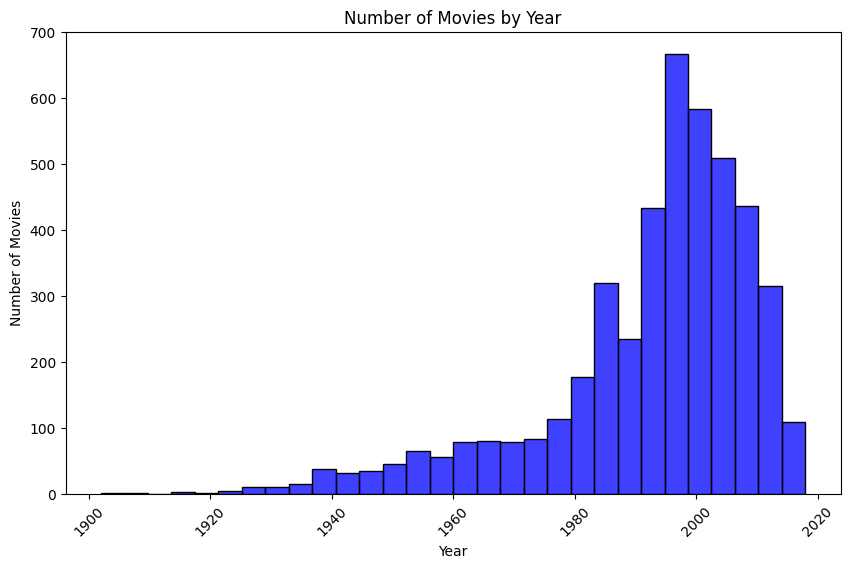

In [191]:
plt.figure(figsize=(10,6))
sns.histplot(movies_df['Year'].dropna(), bins=30, kde=False, color='blue')
plt.title('Number of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


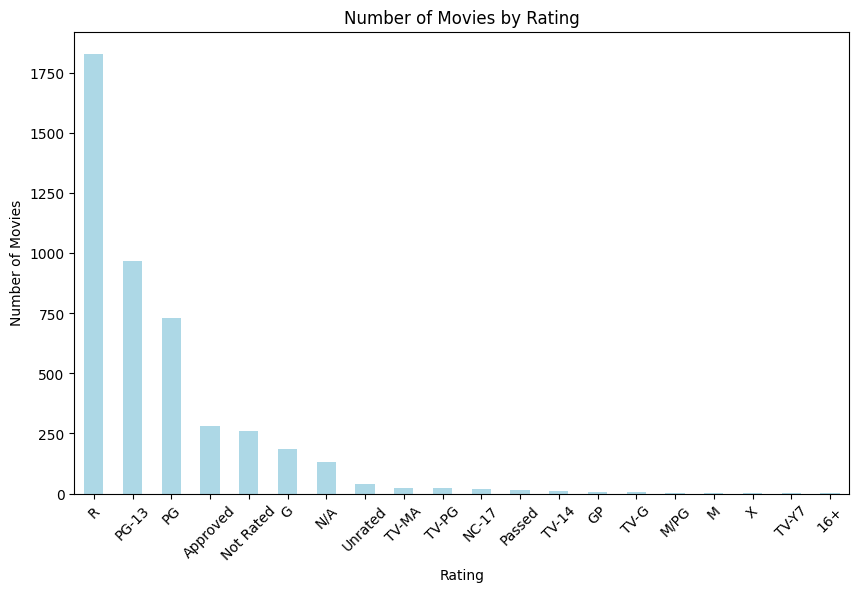

In [192]:
plt.figure(figsize=(10,6))
movies_df['Rated'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Number of Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


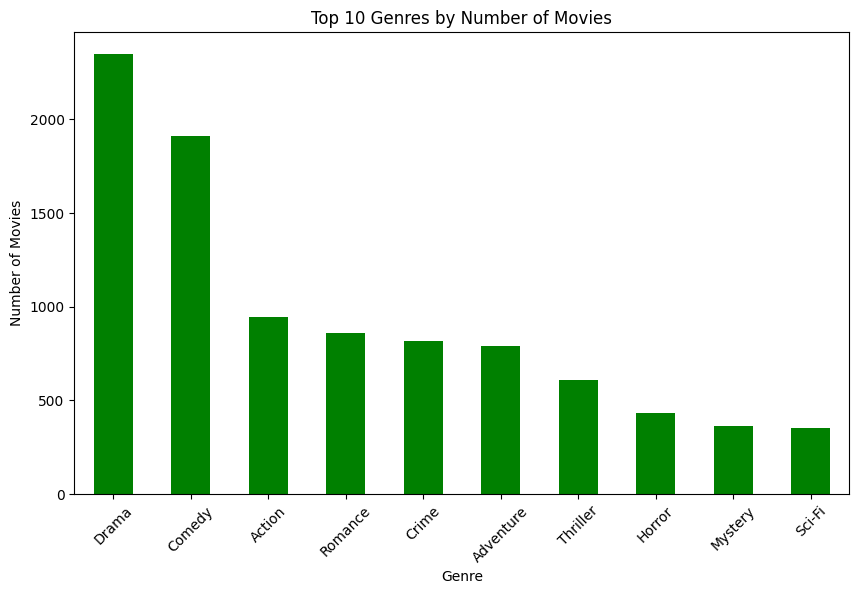

In [193]:
# Explode genres into individual rows
genres_df = movies_df.explode('Genre')

# Count occurrences of each genre
genre_counts = genres_df['Genre'].value_counts()

# Plot top genres
plt.figure(figsize=(10,6))
genre_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Genres by Number of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [194]:
len(genre_counts)

28

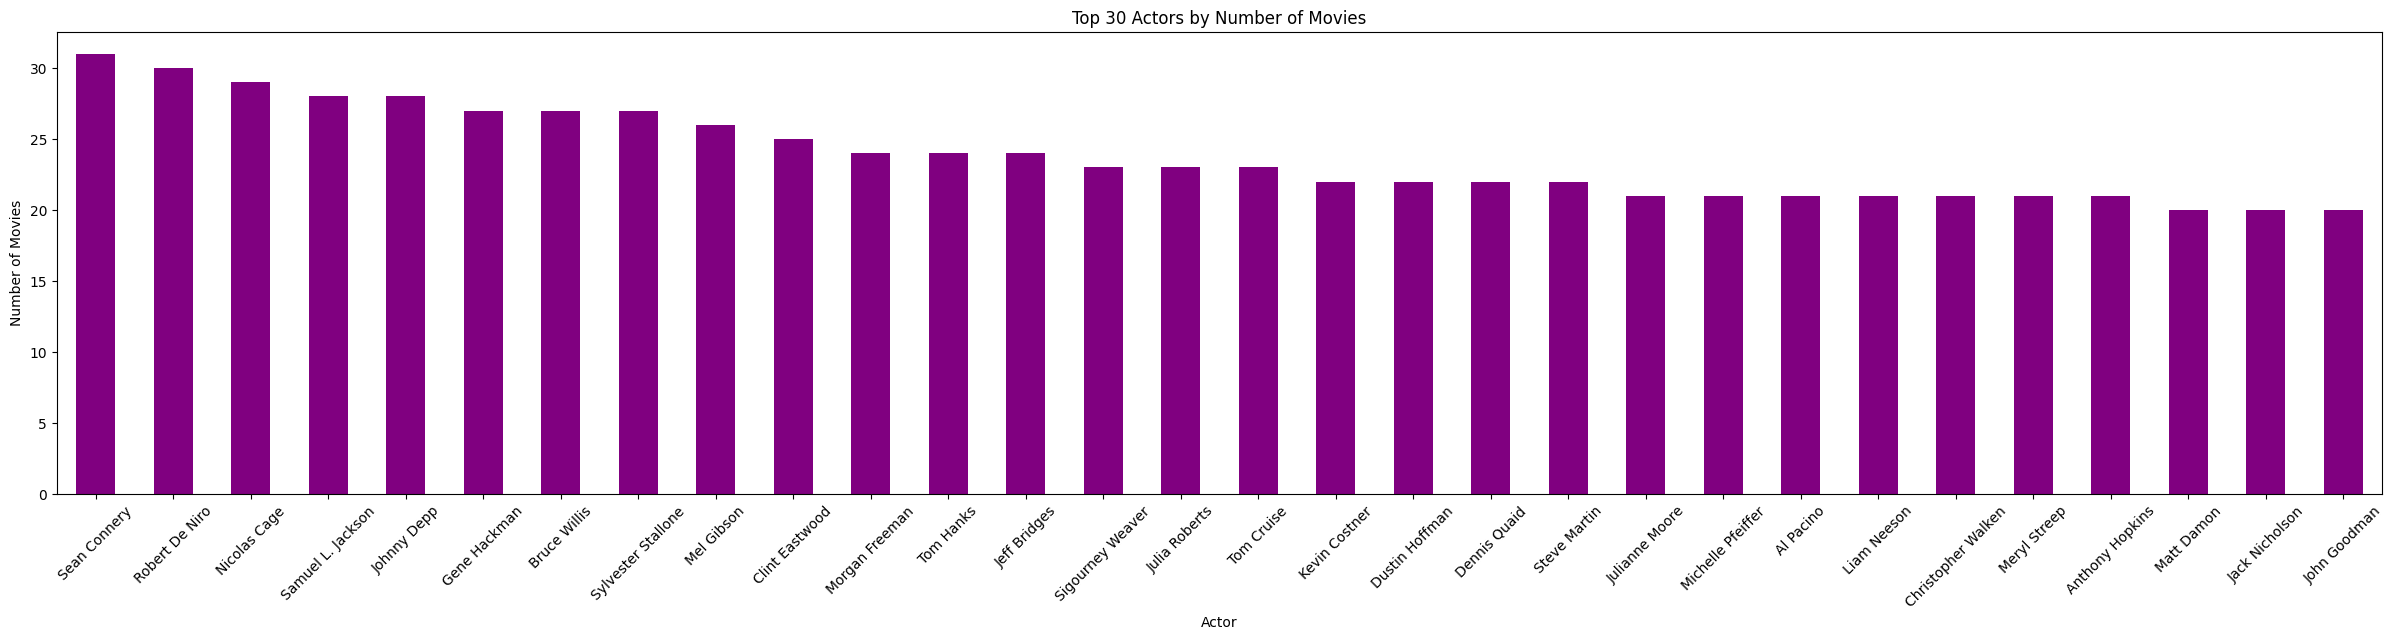

In [195]:
# Explode actors into individual rows
actors_df = movies_df.explode('Actors')

# Count occurrences of each actor
actor_counts = actors_df['Actors'].value_counts()

# Plot top actors
plt.figure(figsize=(30,6))
actor_counts.head(30).plot(kind='bar', color='purple')
plt.title('Top 30 Actors by Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


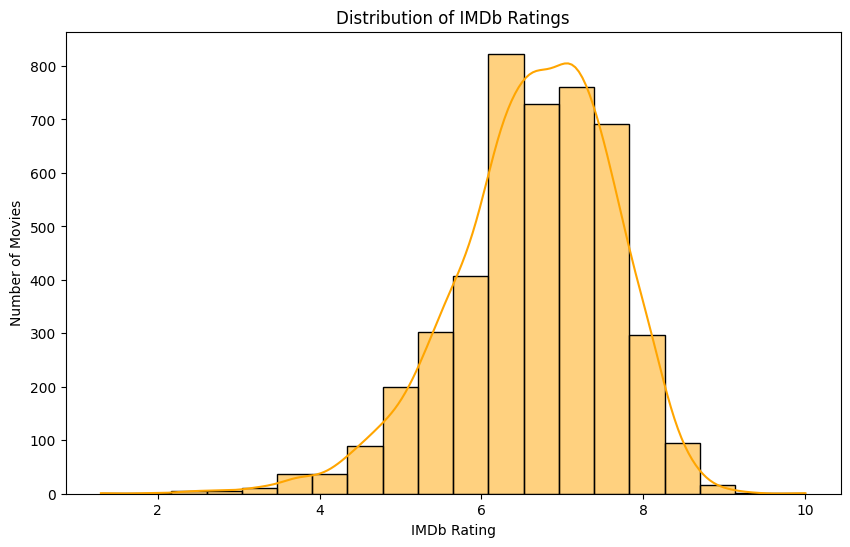

In [196]:
plt.figure(figsize=(10,6))
sns.histplot(movies_df['imdbRating'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.show()


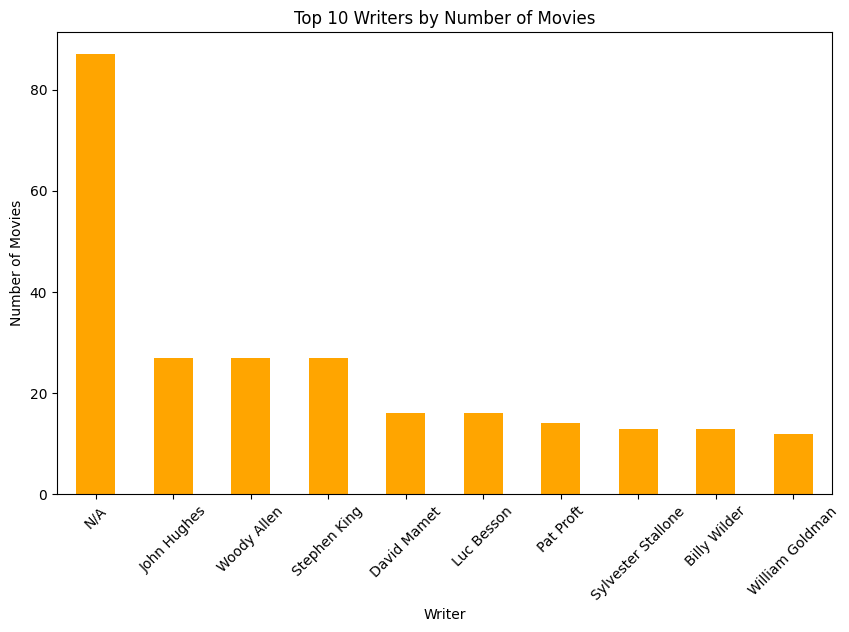

In [197]:
# Explode writers into individual rows
writers_df = movies_df.explode('Writer')

# Remove any remaining N/A values in the exploded 'Writer' column
writers_df = writers_df.dropna(subset=['Writer'])

# Count occurrences of each writer
writer_counts = writers_df['Writer'].value_counts()

# Plot top writers
plt.figure(figsize=(10, 6))
writer_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Writers by Number of Movies')
plt.xlabel('Writer')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

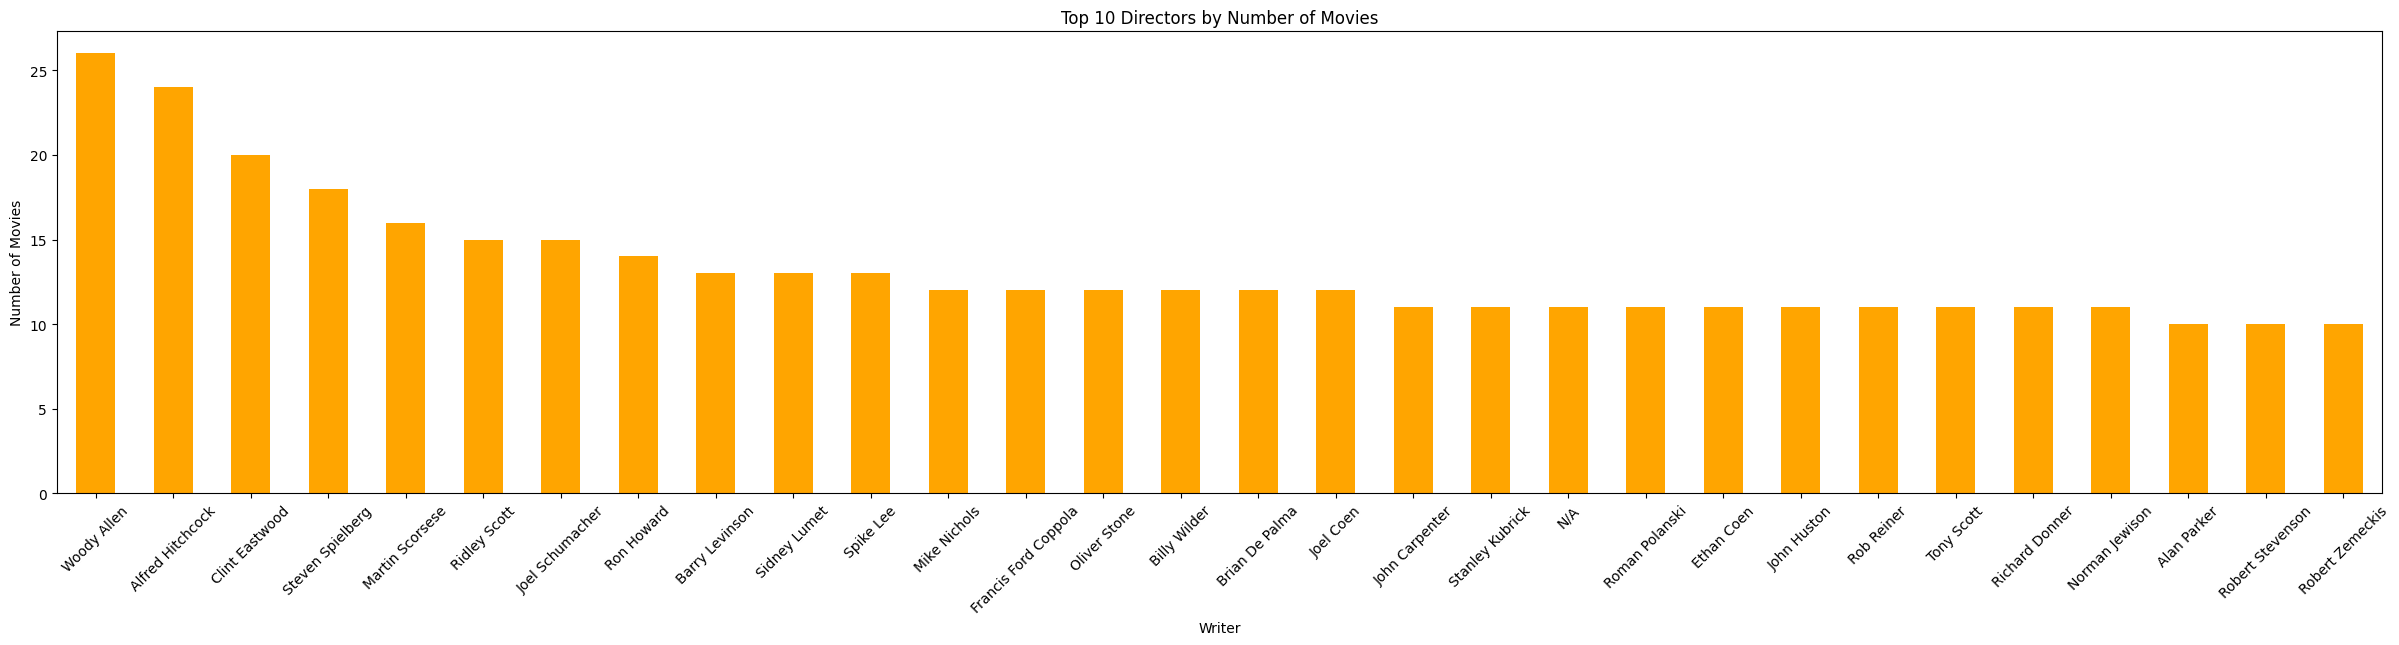

In [199]:
# Explode writers into individual rows
directors_df = movies_df.explode('Director')

# Remove any remaining N/A values in the exploded 'Writer' column
directors_df = directors_df.dropna(subset=['Director'])

# Count occurrences of each writer
director_counts = directors_df['Director'].value_counts()

# Plot top writers
plt.figure(figsize=(30, 6))
director_counts.head(30).plot(kind='bar', color='orange')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Writer')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [201]:
columns_to_keep = ['Title', 'Year', 'Rated', 'Genre', 'imdbRating', 'imdbVotes']
filtered = copy[columns_to_keep].copy()

In [202]:
filtered

Title  Year  Rated  \
0                              Toy Story  1995      G   
1                                Jumanji  1995     PG   
2                       Grumpier Old Men  1995  PG-13   
3                      Waiting to Exhale  1995      R   
4            Father of the Bride Part II  1995     PG   
...                                  ...   ...    ...   
4529                        The Commuter  2018  PG-13   
4530                          Game Night  2018      R   
4531                         Elsa y Fred  2005     PG   
4532                         Tomb Raider  2018  PG-13   
4533  Fred Armisen: Standup For Drummers  2018    N/A   

                             Genre imdbRating  imdbVotes  
0     Animation, Adventure, Comedy        8.3  1,084,764  
1        Adventure, Comedy, Family        7.1    384,663  
2                  Comedy, Romance        6.7     30,011  
3           Comedy, Drama, Romance        6.0     12,462  
4          Comedy, Family, Romance        6.1     42,152  
...                            ...        ...        ...  
4529     Action, Mystery, Thriller        6.3    126,747  
4530     Action, Adventure, Comedy        6.9    259,342  
4531        Comedy, Drama, Romance        7.5      3,573  
4532    Action, Adventure, Fantasy        6.3    230,178  
4533                        Comedy        5.8      1,428  

[4534 rows x 6 columns]